![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the current working directory
import os; os.chdir('drive/My Drive/Colab Notebooks/Great Learning/ Project 1- Advanced Computer Vision - Face Mask Prediction using U-Net')

In [3]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [4]:
import numpy as np
data = np.load('images.npy', allow_pickle=True)

print("Shape of Data \n", data.shape)

Shape of Data 
 (409, 2)


### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

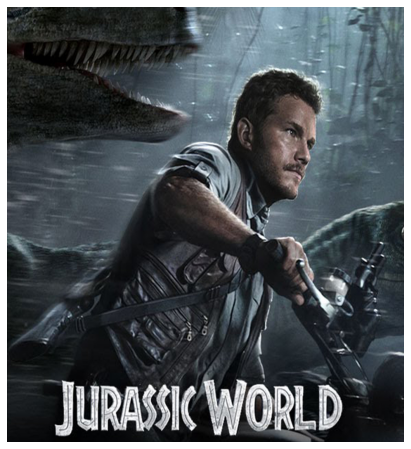

In [5]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(data[50][0])
plt.show()

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [6]:
ALPHA = 1 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

IMAGE_SIZE = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [7]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

print(X.shape)
print(masks.shape)

(409, 224, 224, 3)
(409, 224, 224)


### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

Training data

In [8]:
X_train = X[:400]
y_train = masks[:400]

print(X_train.shape)
print(y_train.shape)

(400, 224, 224, 3)
(400, 224, 224)


Testing data

In [9]:
X_test = X[400:]
y_test = masks[400:]

print(X_test.shape)
print(y_test.shape)

(9, 224, 224, 3)
(9, 224, 224)


### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  ...
  [ 0.58431375  0.7019608   0.74117649]
  [ 0.34901965  0.4666667   0.50588238]
  [ 0.25490201  0.37254906  0.41176474]]

 [[ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  ...
  [ 0.58431375  0.7019608   0.74117649]
  [ 0.34901965  0.4666667   0.50588238]
  [ 0.25490201  0.37254906  0.41176474]]

 [[ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  ...
  [ 0.59215689  0.70980394  0.74901962]
  [ 0.34901965  0.4666667   0.50588238]
  [ 0.25490201  0.37254906  0.41176474]]

 ...

 [[ 0.29411769  0.3176471   0.36470592]
  [ 0.26274514  0.27843142  0.35686278]
  [ 0.53725493  0.56078434  0.65490198]
  ...
  [-0.43529409 -0.40392154 -0.38039213]
  [-0.45098037 -0.41960782 -0.39607841]
  [-0.47450978 -0.44313723 -0.41960782]]

 [

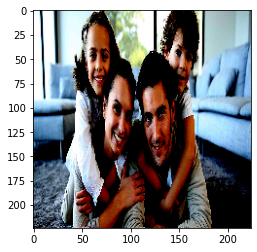

In [10]:
pyplot.imshow(X_train[13])
print(X_train[13])

Print the mask

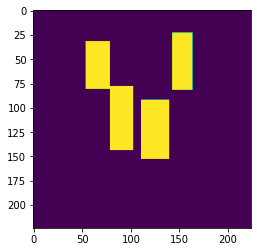

In [11]:
pyplot.imshow(y_train[13])

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [12]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    #### Add your code here ####
    block1 = model.get_layer("conv_pw_1_relu").output ### Output shape of (112, 112, 32)   
    block2 = model.get_layer("conv_pw_3_relu").output ### Output shape of (56, 56, 128)
    block3 = model.get_layer("conv_pw_5_relu").output ### Output shape of (28, 28, 256)
    block4 = model.get_layer("conv_pw_11_relu").output ### Output shape of (14, 14, 512)
    block5 = model.get_layer("conv_pw_13_relu").output ### Output shape of (7, 7, 1024)

    x = Concatenate()([UpSampling2D()(block5), block4]) ### U-NET layer upsampling from (7, 7, 1024) to (14, 14, 1536)
    x = Concatenate()([UpSampling2D()(x), block3]) ### U-NET layer upsampling from (14, 14, 1536) to (28, 28, 1792)
    x = Concatenate()([UpSampling2D()(x), block2]) ### U-NET layer upsampling from (28, 28, 1792) to (56, 56, 1920)
    x = Concatenate()([UpSampling2D()(x), block1]) ### U-NET layer upsampling from (56, 56, 1920) to (112, 112, 198)
    x = UpSampling2D()(x) ### U-NET layer upsampling from (112, 112, 198) to (224, 224, 198)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs = x)

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [13]:
model = create_model()

17227776/17225924 [==============================] - 0s 0us/step


### Print model summary (2 marks)

In [14]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [15]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss function (3 marks)

In [16]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import tensorflow as tf

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

In [18]:
adam = Adam(lr = 1e-4, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad = False)
model.compile(loss = loss, optimizer = adam, metrics = [dice_coefficient])

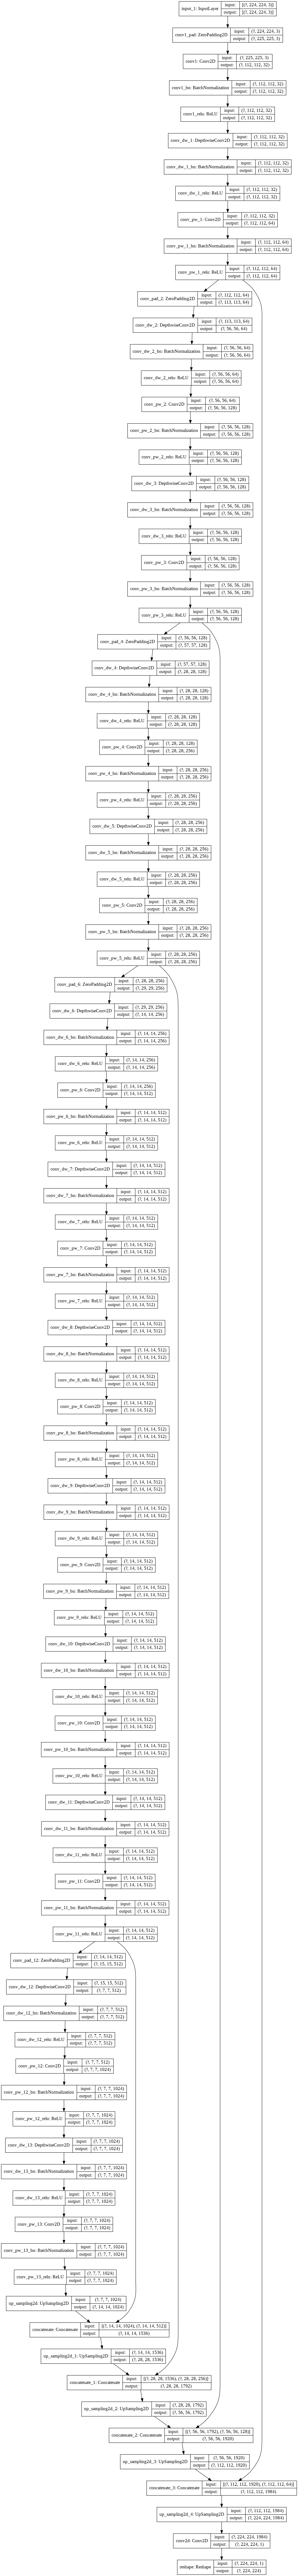

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [21]:
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1, callbacks = [checkpoint, reduce_lr, stop], validation_split=0.15)

Epoch 1/10
339/340 [============================>.] - ETA: 0s - loss: 1.3871 - dice_coefficient: 0.4339WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0034s vs `on_test_batch_end` time: 0.0141s). Check your callbacks.

Epoch 00001: loss improved from inf to 1.38966, saving model to model-1.39.h5
340/340 [==============================] - 18s 52ms/step - loss: 1.3897 - dice_coefficient: 0.4338 - val_loss: 1.2471 - val_dice_coefficient: 0.4495
Epoch 2/10
340/340 [==============================] - ETA: 0s - loss: 0.8190 - dice_coefficient: 0.6039
Epoch 00002: loss improved from 1.38966 to 0.81904, saving model to model-0.82.h5
340/340 [==============================] - 17s 51ms/step - loss: 0.8190 - dice_coefficient: 0.6039 - val_loss: 1.0912 - val_dice_coefficient: 0.4922
Epoch 3/10
340/340 [==============================] - ETA: 0s - loss: 0.6350 - dice_coefficient: 0.6739
Epoch 00003: loss improved from 0.81904 to 0.63502, savin

### Get the predicted mask for a test image   (3 marks)

In [22]:
preds_test = model.predict(X_test, verbose=1)

1/1 [==============================] - 0s 15ms/step


Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


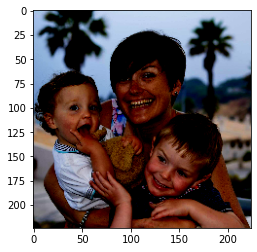

In [23]:
# For a sample image
plt.imshow(X_test[0])

Show original mask for test image

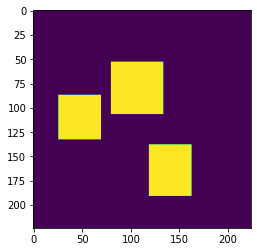

In [24]:
plt.imshow(y_test[0])

Predict the mask on the test image

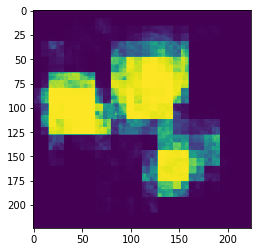

In [25]:
plt.imshow(preds_test[0])

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


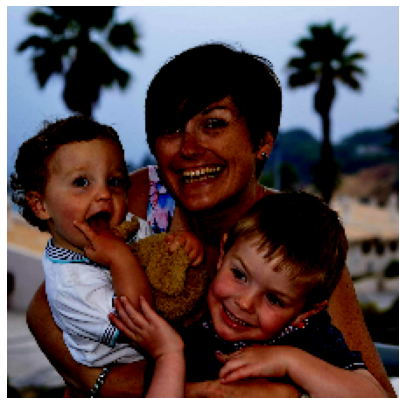

In [26]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(X_test[0])
plt.savefig('image.jpg', bbox_inches = 'tight', pad_inches = 0)

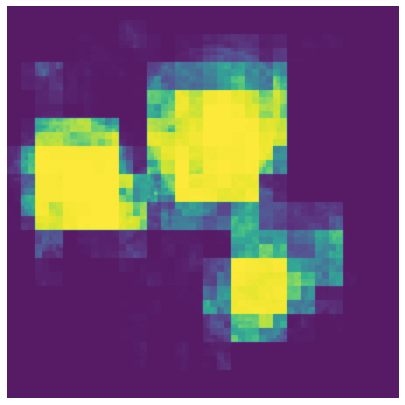

In [29]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(preds_test[0], alpha = 0.9)
plt.savefig('mask.jpg', bbox_inches = 'tight', pad_inches = 0)

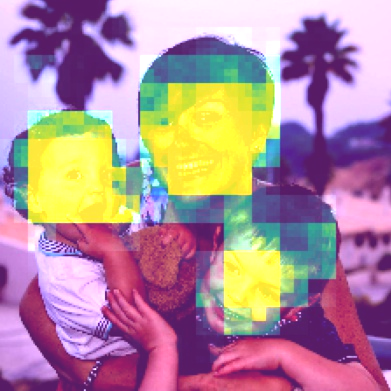

In [30]:
from google.colab.patches import cv2_imshow
img = cv2.imread('image.jpg', 1)
mask = cv2.imread('mask.jpg', 1)
img = cv2.add(img, mask)
cv2_imshow(img)